Import necessary libraries

In [11]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


Load the Datasets

In [12]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Display the first few rows of the customers data
customers.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Data Preprocessing

In [13]:
# Merge customer and transaction data
customer_transactions = pd.merge(transactions, customers, on="CustomerID")

# Create additional features (e.g., total transaction value per customer)
customer_summary = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'nunique',  # Number of unique transaction dates per customer
}).reset_index()

# Add customer demographic information
customer_summary = pd.merge(customer_summary, customers[['CustomerID', 'Region']], on="CustomerID")

# Display the first few rows
customer_summary.head()


,CustomerID,TotalValue,Quantity,TransactionDate,Region
0,C0001,3354.52,12,5,South America
1,C0002,1862.74,10,4,Asia
2,C0003,2725.38,14,4,South America
3,C0004,5354.88,23,8,South America
4,C0005,2034.24,7,3,Asia


Feature Engineering

In [14]:
# Standardize the data for clustering
features = customer_summary[['TotalValue', 'Quantity', 'TransactionDate']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the scaled features
scaled_features[:5]

array([[-0.06170143, -0.12203296, -0.01145819],
       [-0.87774353, -0.44800021, -0.46749414],
       [-0.40585722,  0.20393428, -0.46749414],
       [ 1.03254704,  1.67078689,  1.35664965],
       [-0.78392861, -0.93695108, -0.92353008]])

Apply KMeans Clustering

In [15]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change n_clusters to any value between 2 and 10
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the clustered data
customer_summary.head()

,CustomerID,TotalValue,Quantity,TransactionDate,Region,Cluster
0,C0001,3354.52,12,5,South America,2
1,C0002,1862.74,10,4,Asia,2
2,C0003,2725.38,14,4,South America,2
3,C0004,5354.88,23,8,South America,0
4,C0005,2034.24,7,3,Asia,1


Calculate Davies-Bouldin Index

In [16]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_summary['Cluster'])

print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8650620583623065


 Visualize the Clusters

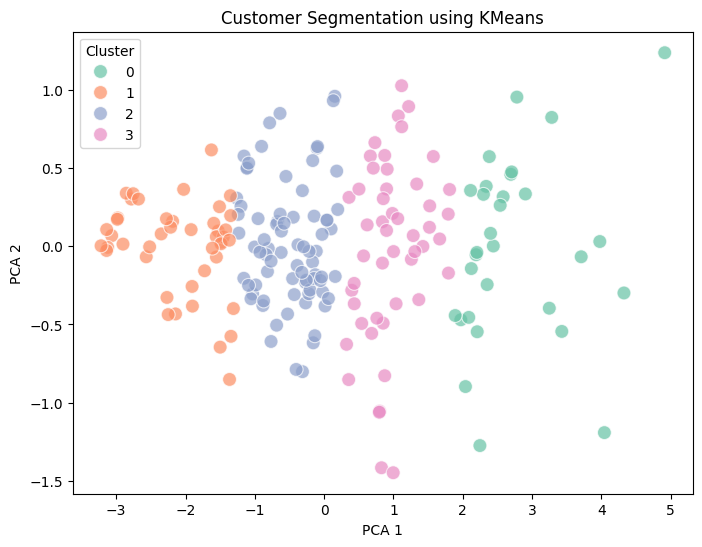

In [17]:
# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = customer_summary['Cluster']

# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=pca_df, s=100, alpha=0.7)
plt.title('Customer Segmentation using KMeans')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

Report Clustering Results

In [18]:
# Report the number of clusters formed
num_clusters = customer_summary['Cluster'].nunique()
print(f'Number of clusters formed: {num_clusters}')

# Report Davies-Bouldin Index
print(f'Davies-Bouldin Index: {db_index}')

Number of clusters formed: 4
Davies-Bouldin Index: 0.8650620583623065
